In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## import data
data_path = "data/abalone.csv"
abalone_data = pd.read_csv(data_path, header=None)
abalone_data.head(5)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
np_abalone_data = np.array(abalone_data)
print(np_abalone_data[0:5,])

[['M' 0.455 0.365 0.095 0.514 0.2245 0.101 0.15 15]
 ['M' 0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 ['F' 0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 ['M' 0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 ['I' 0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]]


In [4]:
datax = np_abalone_data[:,1:]
datay = np_abalone_data[:,0]
print(datax[0:5,:])
print(datay[0:10])

[[0.455 0.365 0.095 0.514 0.2245 0.101 0.15 15]
 [0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 [0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 [0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 [0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]]
['M' 'M' 'F' 'M' 'I' 'I' 'F' 'F' 'M' 'F']


In [5]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3)
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [6]:
# MLP Classifier 모델 만들기
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 15, 10, ), max_iter=500)
clf.fit(trnx, trny)
tsty_hat = clf.predict(tstx)

In [7]:
print(clf)
print(tsty[0:10])
print(tsty_hat[0:10])

MLPClassifier(hidden_layer_sizes=(10, 15, 10), max_iter=500)
['F' 'I' 'M' 'M' 'F' 'I' 'M' 'M' 'I' 'M']
['M' 'I' 'I' 'M' 'M' 'M' 'M' 'M' 'I' 'M']


In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(tsty, tsty_hat))

0.5502392344497608


In [9]:
# SVC
from sklearn.svm import SVC
svc_model = SVC(C=1000, kernel='rbf', degree=3, gamma=0.1, coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
svc_model.fit(X=trnx, y=trny)
svc_tsty_hat = svc_model.predict(tstx)
accuracy_score(tsty, svc_tsty_hat)

0.5534290271132376

In [10]:
print(tsty)
print(svc_tsty_hat)

['F' 'I' 'M' ... 'I' 'M' 'M']
['M' 'I' 'I' ... 'I' 'M' 'M']


In [11]:
# tensorflow keras NN 1
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
input_shape = (8, )
mlp_model1 = models.Sequential()
mlp_model1.add(layers.Dense(units=32, activation='relu', input_shape=input_shape))
mlp_model1.add(layers.Dense(units=16, activation='relu'))
mlp_model1.add(layers.Dense(units=8, activation='relu'))
# mlp_model1.add(layers.Dropout(0.1))
mlp_model1.add(layers.Dense(units=3, activation='softmax'))
mlp_model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 979
Trainable params: 979
Non-trainable params: 0
_________________________________________________________________


2022-05-30 22:43:37.379964: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-30 22:43:37.380330: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [12]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
trny_onehot = encoder.fit_transform(trny)
tsty_onehot = encoder.transform(tsty)

print(trny_onehot[0:5])
print(tsty_onehot[0:5])

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


In [13]:
history1 = mlp_model1.fit(np.asarray(trnx).astype(float), np.asarray(trny_onehot).astype(float), validation_data=[np.asarray(tstx).astype(float), np.asarray(tsty_onehot).astype(float)], batch_size=20, epochs=50)

Train on 2923 samples, validate on 1254 samples
Epoch 1/50
2923/2923 [==============================] - 2s 551us/sample - loss: 1.0794 - accuracy: 0.3537 - val_loss: 1.0634 - val_accuracy: 0.3596
Epoch 2/50
2923/2923 [==============================] - 0s 138us/sample - loss: 1.0391 - accuracy: 0.3691 - val_loss: 1.0223 - val_accuracy: 0.4187
Epoch 3/50
2923/2923 [==============================] - 0s 136us/sample - loss: 1.0003 - accuracy: 0.4639 - val_loss: 0.9815 - val_accuracy: 0.4817
Epoch 4/50
2923/2923 [==============================] - 0s 134us/sample - loss: 0.9363 - accuracy: 0.5115 - val_loss: 0.9107 - val_accuracy: 0.5375
Epoch 5/50
2923/2923 [==============================] - 0s 131us/sample - loss: 0.9050 - accuracy: 0.5197 - val_loss: 0.8873 - val_accuracy: 0.5303
Epoch 6/50
2923/2923 [==============================] - 0s 131us/sample - loss: 0.8881 - accuracy: 0.5340 - val_loss: 0.8822 - val_accuracy: 0.5175
Epoch 7/50
2923/2923 [==============================] - 0s 130us

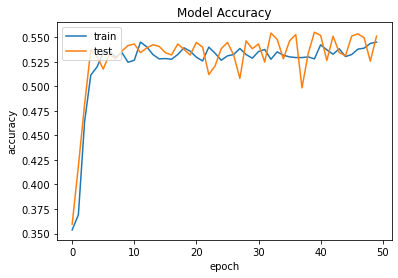

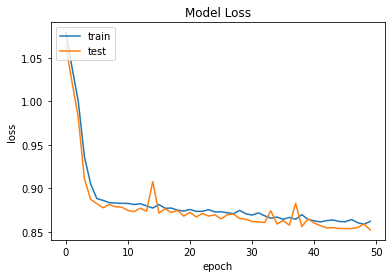

In [14]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
input_shape = (8, )
mlp_model2 = models.Sequential()
mlp_model2.add(layers.Dense(units=500, activation='relu', input_shape=input_shape))
mlp_model2.add(layers.Dense(units=1000, activation='relu', input_shape=input_shape))
mlp_model2.add(layers.Dense(units=500, activation='relu', input_shape=input_shape))
mlp_model2.add(layers.Dense(units=250, activation='relu', input_shape=input_shape))
mlp_model2.add(layers.Dense(units=100, activation='relu', input_shape=input_shape))
# mlp_model2.add(layers.Dropout(0.1))
mlp_model2.add(layers.Dense(units=3, activation='softmax'))
mlp_model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               4500      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_7 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 303       
Total params: 1,156,653
Trainable params: 1,156,653
Non-trainable params: 0
____________________________________________

In [16]:
encoder = LabelBinarizer()
trny_onehot = encoder.fit_transform(trny)
tsty_onehot = encoder.transform(tsty)

print(trny_onehot[0:5])
print(tsty_onehot[0:5])

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


In [17]:
history2 = mlp_model2.fit(np.asarray(trnx).astype(float), np.asarray(trny_onehot).astype(float), validation_data=[np.asarray(tstx).astype(float), np.asarray(tsty_onehot).astype(float)], batch_size=20, epochs=50)

Train on 2923 samples, validate on 1254 samples
Epoch 1/50
2923/2923 [==============================] - 3s 1ms/sample - loss: 1.0295 - accuracy: 0.4177 - val_loss: 0.9018 - val_accuracy: 0.5295
Epoch 2/50
2923/2923 [==============================] - 2s 800us/sample - loss: 0.9129 - accuracy: 0.5094 - val_loss: 0.8794 - val_accuracy: 0.5494
Epoch 3/50
2923/2923 [==============================] - 2s 837us/sample - loss: 0.8832 - accuracy: 0.5327 - val_loss: 0.8625 - val_accuracy: 0.5470
Epoch 4/50
2923/2923 [==============================] - 3s 905us/sample - loss: 0.8709 - accuracy: 0.5323 - val_loss: 0.8570 - val_accuracy: 0.5271
Epoch 5/50
2923/2923 [==============================] - 3s 890us/sample - loss: 0.8735 - accuracy: 0.5474 - val_loss: 0.8759 - val_accuracy: 0.5088
Epoch 6/50
2923/2923 [==============================] - 3s 898us/sample - loss: 0.8696 - accuracy: 0.5306 - val_loss: 0.8595 - val_accuracy: 0.5247
Epoch 7/50
2923/2923 [==============================] - 3s 905us/s

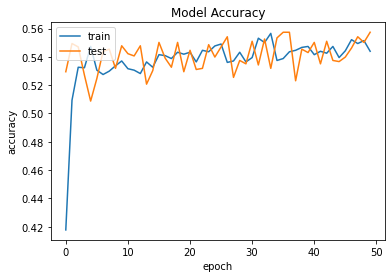

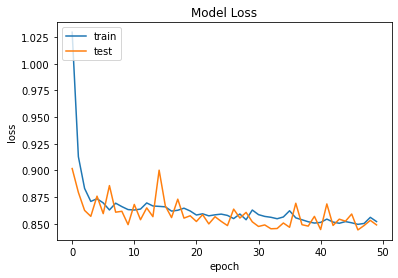

In [18]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
np_abalone_data = np.array(abalone_data)
print(np_abalone_data[0:5,])

[['M' 0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 ['F' 0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 ['M' 0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 ['I' 0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]
 ['I' 0.425 0.3 0.095 0.3515 0.141 0.0775 0.12 8]]


In [5]:
datax = np_abalone_data[:,1:]
datay = np_abalone_data[:,0]
print(datax[0:5,:])
print(datay[0:10])

[[0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 [0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 [0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 [0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]
 [0.425 0.3 0.095 0.3515 0.141 0.0775 0.12 8]]
['M' 'F' 'M' 'I' 'I' 'F' 'F' 'M' 'F' 'F']


In [7]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3)
print(trnx.shape, tstx.shape, tstx.shape, tsty.shape)

(2923, 8) (1253, 8) (1253, 8) (1253,)


In [8]:
# Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trnx)
trnx_scale = scaler.transform(trnx)
tstx_scale = scaler.transform(tstx)
print(np.min(trnx_scale[:, 0]), np.max(trnx_scale[:, 0]))
print(np.min(tstx_scale[:, 0]), np.max(tstx_scale[:, 0]))

0.0 1.0
0.047297297297297314 0.9527027027027029


In [9]:
# MLP Classifier 모델 만들기
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=500)
clf.fit(trnx, trny)
tsty_hat = clf.predict(tstx)

In [10]:
print(clf)
print(tsty[0:10])
print(tsty_hat[0:10])

MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)
['F' 'M' 'M' 'I' 'I' 'I' 'I' 'M' 'F' 'I']
['I' 'M' 'M' 'I' 'I' 'I' 'I' 'I' 'F' 'I']


In [11]:
clf2 = MLPClassifier(hidden_layer_sizes=(10, 15, 10, ), max_iter=500)
clf2.fit(trnx, trny)
tsty_hat2 = clf2.predict(tstx)
print(tsty[0:10])
print(tsty_hat2[0:10])

['F' 'M' 'M' 'I' 'I' 'I' 'I' 'M' 'F' 'I']
['I' 'M' 'M' 'I' 'I' 'I' 'I' 'I' 'F' 'I']


In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(tsty, tsty_hat), accuracy_score(tsty, tsty_hat2))

0.5506783719074222 0.5490822027134876


In [19]:
# SVM 모델 만들기
from sklearn.svm import SVC
svc_model = SVC(C=100, kernel='rbf', degree=3, gamma=0.1, coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
svc_model.fit(X=trnx, y=trny)
tsty_hat = svc_model.predict(tstx)
accuracy_score(tsty, tsty_hat)

0.5434956105347167

In [20]:
print(tsty)
print(tsty_hat)

['F' 'M' 'M' ... 'F' 'M' 'F']
['M' 'F' 'F' ... 'M' 'M' 'M']


In [37]:
# tensorflow keras
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
input_shape = (8, )
mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units=32, activation='relu', input_shape=input_shape))
mlp_model.add(layers.Dense(units=16, activation='relu'))
mlp_model.add(layers.Dense(units=8, activation='relu'))
mlp_model.add(layers.Dense(units=3, activation='softmax'))
mlp_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 27        
Total params: 979
Trainable params: 979
Non-trainable params: 0
_________________________________________________________________


In [38]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
trny_onehot = encoder.fit_transform(trny)
tsty_onehot = encoder.transform(tsty)

print(trny_onehot[0:5])
print(tsty_onehot[0:5])

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]]
[[1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]]


In [39]:
history = mlp_model.fit(np.asarray(trnx).astype(float), np.asarray(trny_onehot).astype(float), validation_data=[np.asarray(tstx).astype(float), np.asarray(tsty_onehot).astype(float)], batch_size=10, epochs=60)

Train on 2923 samples, validate on 1253 samples
Epoch 1/60
2923/2923 [==============================] - 2s 550us/sample - loss: 1.0719 - accuracy: 0.3821 - val_loss: 1.0406 - val_accuracy: 0.5395
Epoch 2/60
2923/2923 [==============================] - 1s 249us/sample - loss: 0.9842 - accuracy: 0.5056 - val_loss: 0.9074 - val_accuracy: 0.5315
Epoch 3/60
2923/2923 [==============================] - 1s 251us/sample - loss: 0.9062 - accuracy: 0.5228 - val_loss: 0.9027 - val_accuracy: 0.5124
Epoch 4/60
2923/2923 [==============================] - 1s 249us/sample - loss: 0.8955 - accuracy: 0.5262 - val_loss: 0.8749 - val_accuracy: 0.5387
Epoch 5/60
2923/2923 [==============================] - 1s 251us/sample - loss: 0.8879 - accuracy: 0.5248 - val_loss: 0.8820 - val_accuracy: 0.5243
Epoch 6/60
2923/2923 [==============================] - 1s 256us/sample - loss: 0.8878 - accuracy: 0.5358 - val_loss: 0.8665 - val_accuracy: 0.5371
Epoch 7/60
2923/2923 [==============================] - 1s 250us

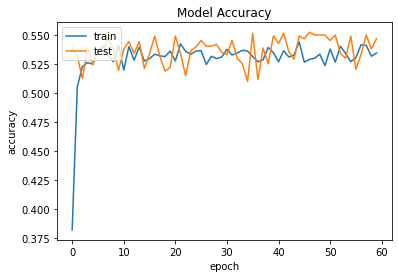

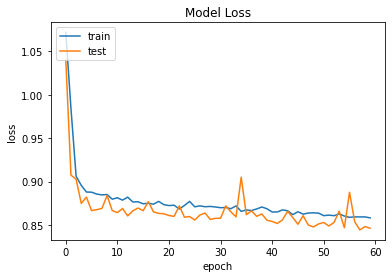

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()